In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4243, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 4243 (delta 16), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4243/4243), 30.38 MiB | 26.18 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [3]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import wave
import pylab
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.nn.parameter import Parameter
from scipy import signal
from scipy.io import wavfile
from pathlib import Path
from torchvision import transforms
import glob
import librosa
import librosa.display
import random
from tqdm import tqdm_notebook as tqdm

In [4]:
!pip install natsort

In [5]:
from natsort import natsorted

In [6]:
INPUT_DIR = './free-spoken-digit-dataset/recordings'

OUTPUT_DIR = './'

In [7]:
import torchaudio

In [8]:
X = []
y = []

In [9]:
# Iterate through each sound file
for index, file_name in enumerate(natsorted(os.listdir(INPUT_DIR))):
    label = Path(file_name).stem[0]
    file_path = os.path.join(INPUT_DIR, file_name)
    
    signal, sr = torchaudio.load(file_path)
#     print(label)
#     print(signal.shape)
    audio = signal.squeeze_().numpy()
#     print(signal.shape)
#     print(audio)
    audio = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=30, n_fft=int(0.02*sr),hop_length=int(0.01*sr))
    audio = np.mean(audio, axis=1)
    X.append(audio)
    y.append(label)  
#     audio_dict["index"].append(index)
#     # audio_dict["data"].append()
#     audio_dict["label"].append(label)
#     audio_dict["file_name"].append(file_name)
#     audio_dict["file_path"].append(file_path)

/opt/conda/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X[6]

array([-537.6795   ,   22.229595 ,   20.73039  ,   17.176752 ,
        -26.434229 ,  -29.847681 ,  -32.957153 ,  -20.871866 ,
        -36.085682 ,    6.6868033,  -18.979677 ,   -0.8323639,
         -4.2934146,   -2.6602263,  -12.088089 ,   -9.690103 ,
        -15.195156 ,    1.9658816,  -12.464099 ,   -5.924007 ,
          2.0005112,    5.159534 ,   -3.0237143,   -1.6139648,
         -5.9541745,   -4.5732346,  -20.264818 ,   -9.39742  ,
         -4.0386825,   -0.9131619], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
y_test.shape

(990,)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Scale the features using StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
print(X_train[10])

[0.9546652  0.24188958 0.22942816 0.63172007 0.30308387 0.36614677
 0.37635252 0.48934612 0.3441123  0.7151088  0.13777158 0.6950481
 0.30505636 0.6229578  0.22998345 0.57269603 0.21312639 0.6588645
 0.3236202  0.27677682 0.34762996 0.26941794 0.4455171  0.40697172
 0.41867203 0.28154787 0.30087882 0.16478282 0.36366296 0.5460647 ]


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
nn = KNeighborsClassifier(n_neighbors=5)

In [20]:
nn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_test_pred = nn.predict(X_test) # predict labels on the test images

In [22]:
# print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % (np.mean(y_test_pred == y_test)))

accuracy: 0.953535


In [23]:
accuracies = []

In [24]:
for k in range(1, 20):
    nn = KNeighborsClassifier(n_neighbors=k)
    nn.fit(X_train, y_train)
    y_test_pred = nn.predict(X_test)
    print('K =', k)
    print('accuracy: %f' % (np.mean(y_test_pred == y_test)))
    accuracies.append(np.mean(y_test_pred == y_test))

K = 1
accuracy: 0.953535
K = 2
accuracy: 0.939394
K = 3
accuracy: 0.954545
K = 4
accuracy: 0.957576
K = 5
accuracy: 0.953535
K = 6
accuracy: 0.949495
K = 7
accuracy: 0.946465
K = 8
accuracy: 0.941414
K = 9
accuracy: 0.944444
K = 10
accuracy: 0.941414
K = 11
accuracy: 0.937374
K = 12
accuracy: 0.934343
K = 13
accuracy: 0.940404
K = 14
accuracy: 0.936364
K = 15
accuracy: 0.938384
K = 16
accuracy: 0.940404
K = 17
accuracy: 0.936364
K = 18
accuracy: 0.936364
K = 19
accuracy: 0.934343


In [25]:
print(max(accuracies))

0.9575757575757575


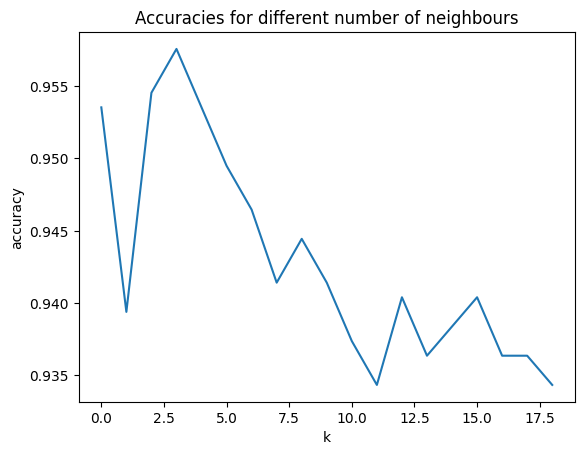

In [29]:
plt.plot(accuracies)
plt.title("Accuracies for different number of neighbours")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()